In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('3.01. Country clusters.csv')
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


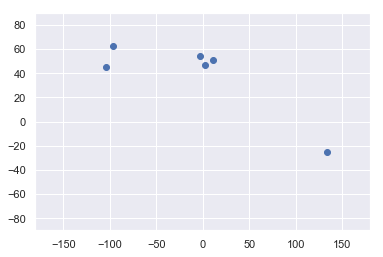

In [3]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [4]:
x = df.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [5]:
km = KMeans(3)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
clus = km.fit_predict(x)
clus

array([0, 0, 1, 1, 1, 2])

In [7]:
Data_with_cluster = df.copy()
Data_with_cluster['Cluster'] = clus
Data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


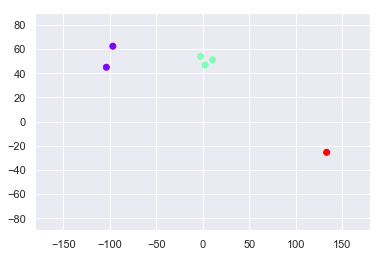

In [8]:
plt.scatter(Data_with_cluster['Longitude'], Data_with_cluster['Latitude'], c = Data_with_cluster['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [9]:
km.inertia_

288.1052333333333

In [10]:
wcss=[]

for i in range(1,7):
    km = KMeans(i)
    km.fit(x)
    wcss_iter = km.inertia_
    wcss.append(wcss_iter)

In [11]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

Text(0, 0.5, 'within cluster sum of sqr')

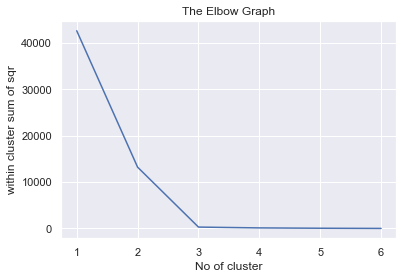

In [12]:
num_clus = range(1,7)
plt.plot(num_clus, wcss)
plt.title('The Elbow Graph')
plt.xlabel('No of cluster')
plt.ylabel('within cluster sum of sqr')